# Law of large Numbers (LLN)


In [160]:
# import modules

import numpy as np
import matplotlib.pyplot as plt


In [161]:
from IPython import display
display.set_matplotlib_formats('svg')

/var/folders/g1/vlzfc7210ln5byyb75gnwg_40000gn/T/ipykernel_16566/2181847305.py:2: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  display.set_matplotlib_formats('svg')


In [162]:
# simulation parameters

population_size = int(2.3e5)
sample_size = 50
num_samples = 500

## Population Of Random Numbers

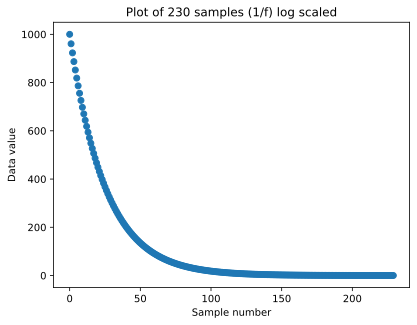

In [163]:
# generate the population of numbers
population = 1 / np.logspace(np.log10(.001),np.log10(10), population_size)

skip = int(1e3) # include every 1000 sample (we cannot visualize 2.3e5 points)
population_mean = np.mean(population)

plt.plot(population[::skip], 'o')

plt.title('Plot of 230 samples (1/f) log scaled')
plt.xlabel('Sample number')
plt.ylabel('Data value')
plt.savefig('distribution_population.svg')

plt.show()

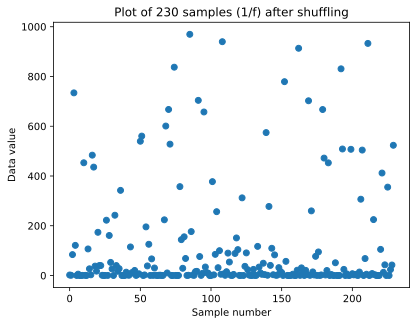

In [164]:
# shuffle the data

np.random.shuffle(population)

plt.plot(population[::skip], 'o')

plt.title('Plot of 230 samples (1/f) after shuffling')
plt.xlabel('Sample number')
plt.ylabel('Data value')

plt.savefig('shuffled_distribution_population.svg')

plt.show()

## Monte Carlo Sampling

In [165]:
# monte carlo sampling

sample_means = np.zeros(num_samples)

for exp_i in range(num_samples):
    sample = np.random.choice(population, size = sample_size) # sampling with replacement
    sample_means[exp_i] = np.mean(sample)


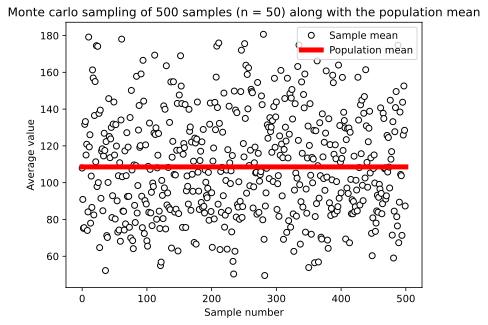

In [166]:
# visualizing sample mean and population (true) mean

plt.plot(sample_means,'ko', markerfacecolor = 'w'   ,label = 'Sample mean')
plt.plot([0, num_samples] , [population_mean, population_mean], 'r', linewidth = 5, label = 'Population mean')
plt.legend()

plt.xlabel('Sample number')
plt.ylabel('Average value')
plt.title('Monte carlo sampling of 500 samples (n = 50) along with the population mean')

plt.savefig('monte_carlo_sampling.svg')

plt.show()

## Cumulative Averaging

In [167]:
# cumulative averaging

cum_avg = np.zeros(num_samples)

# method 1 (using for loop)
for i in range(num_samples):
    cum_avg[i] = np.mean(sample_means[0:i+1])

# method 2
cum_avg2 = np.cumsum(sample_means) / np.arange(1,num_samples + 1)


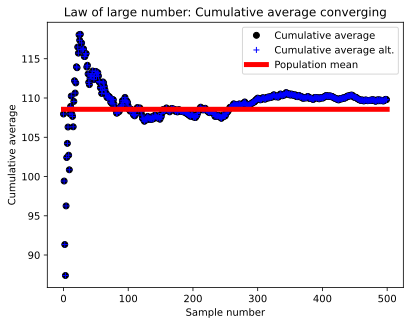

In [168]:
# visualization of Cumulative average

plt.plot(cum_avg, 'ko', label = 'Cumulative average')
plt.plot(cum_avg2, 'b+', label = 'Cumulative average alt.')
plt.plot([0, num_samples] , [population_mean, population_mean], 'r', linewidth = 5, label = 'Population mean')

plt.title('Law of large number: Cumulative average converging')
plt.xlabel('Sample number')
plt.ylabel('Cumulative average')

plt.legend()

plt.savefig('cumulative_averaging.svg')

plt.show()


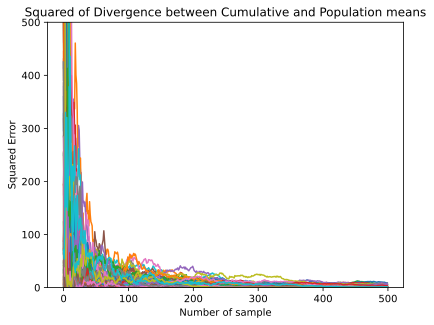

In [169]:
# Squared error

number_meta_sample = 100
cum_aves = np.zeros((number_meta_sample, num_samples))
allsample_means = np.zeros((number_meta_sample, num_samples))

for meta_expi in range(number_meta_sample):
    for exp_i in range(num_samples):
        sample = np.random.choice(population, size = sample_size)
        sample_means[exp_i] = np.mean(sample)

        # get the cumulative average
        tmp = np.cumsum(sample_means) / np.arange(1,num_samples + 1)
        cum_aves[meta_expi,:] = (tmp - population_mean)**2

        # store all sample means
        allsample_means[meta_expi,:] = sample_means

plt.plot(cum_aves.T)
plt.ylim([0,500])

plt.title("Squared of Divergence between Cumulative and Population means")
plt.xlabel('Number of sample')
plt.ylabel('Squared Error')

plt.savefig('squared_error_divergance.svg')

plt.show()

## Central Limit Theorem

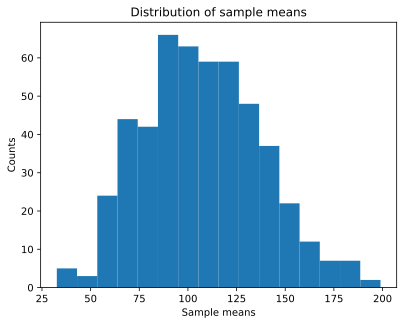

In [170]:
# build a histogram for one sample means

plt.hist(sample_means, bins = 'fd') # Freedman–Diaconis rule

plt.title('Distribution of sample means')
plt.xlabel('Sample means')
plt.ylabel('Counts')


plt.savefig('distribution_one_sample.svg')

plt.show()

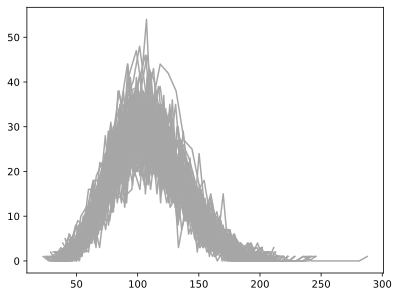

In [171]:
# plot for all meta samples
nbins = 40

for i in range(number_meta_sample):
    y,x = np.histogram(allsample_means[i,:], bins=nbins)
    x = (x[1:] + x[0:-1]) / 2
    value = 0.65
    plt.plot(x, y, color = [value, value, value]) # gray scale (all are equal)
    plt.savefig('distribution_meta_samples.svg')

plt.show()